# Influencer Identification Using Clustering and Classification

### Import Libraries

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

### Load and Preprocess Data

In [2]:
# Load the dataset
file_path = 'profiles.csv' 
df = pd.read_csv(file_path)

In [4]:
print("Dataset Overview:")
df.head()

Dataset Overview:


,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


Handling missing values by substituting them with mean values,

In [18]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df[['followers', 'following', 'likes', 'awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate']] = imputer.fit_transform(
    df[['followers', 'following', 'likes', 'awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate']]
)

# Feature Engineering: Calculating Total Engagement Rate
df['total_engagement_rate'] = df['awg_engagement_rate'] + df['comment_engagement_rate'] + df['like_engagement_rate']

# Standardize features for clustering
features = ['followers', 'following', 'likes', 'videos_count', 'total_engagement_rate']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

### Exploratory Data Analysis (EDA)

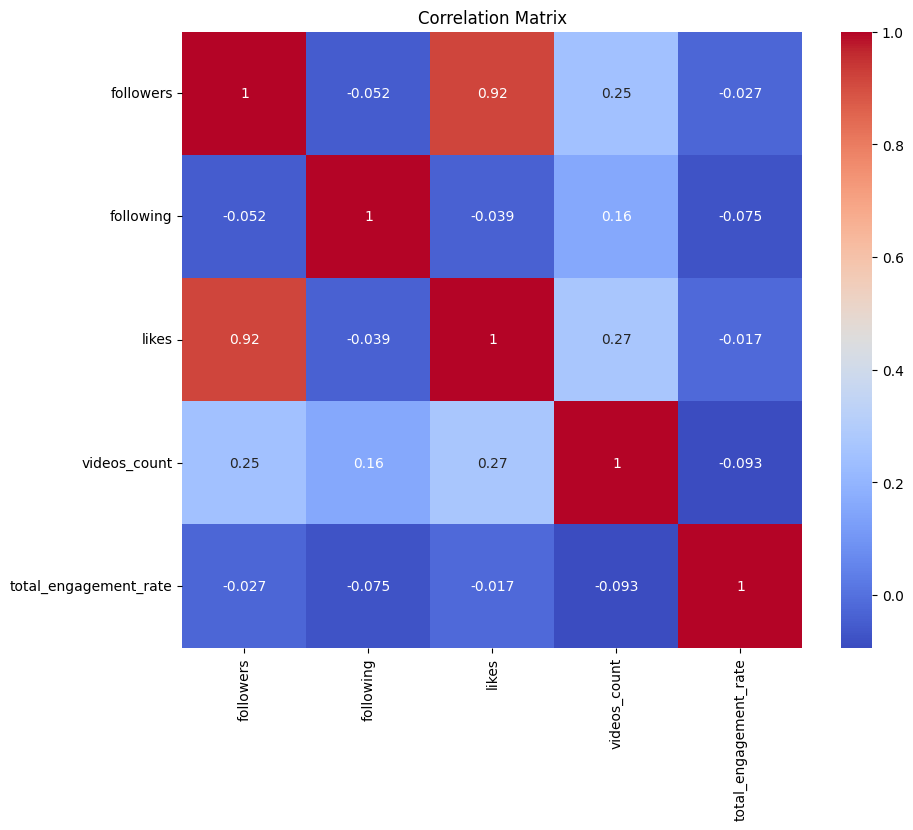

In [21]:
# EDA: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

---

### Correlation Matrix Analysis

#### Key Observations:
1. **Followers and Likes**:
   - There is a very strong positive correlation (0.92) between the number of followers and likes. This suggests that profiles with more followers tend to receive more likes, which is expected in social media dynamics.

2. **Followers and Videos Count**:
   - A moderate positive correlation (0.25) exists between the number of followers and the number of videos posted. This indicates that profiles with more videos tend to have more followers, though the relationship is not as strong as with likes.

3. **Total Engagement Rate**:
   - The total engagement rate shows very weak correlations with all other features, indicating that engagement rates do not directly correlate with followers, following, likes, or video counts.

4. **Following**:
   - The number of profiles a user follows does not significantly correlate with other features, suggesting that following behavior is relatively independent of other profile metrics.

These insights can help in understanding how different metrics are related to each other, which is crucial for building accurate models for influencer identification. The strong correlation between followers and likes, for example, highlights the importance of considering both metrics when assessing a profile's influence.

---

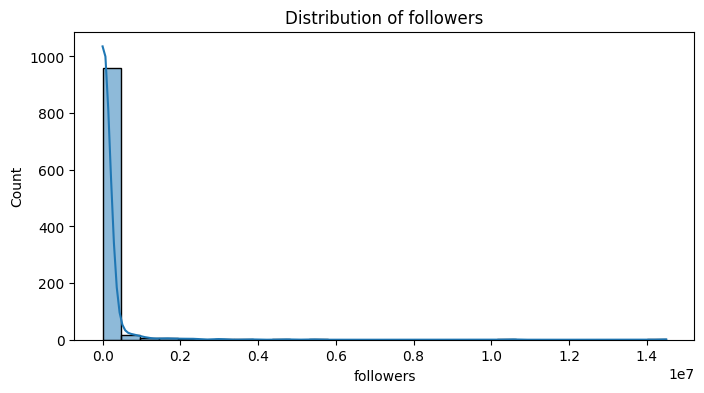

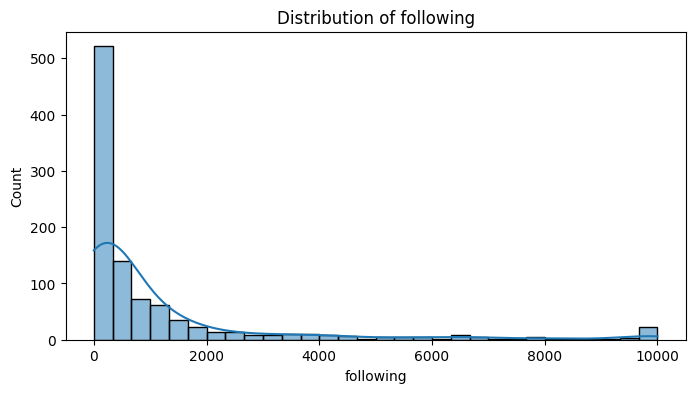

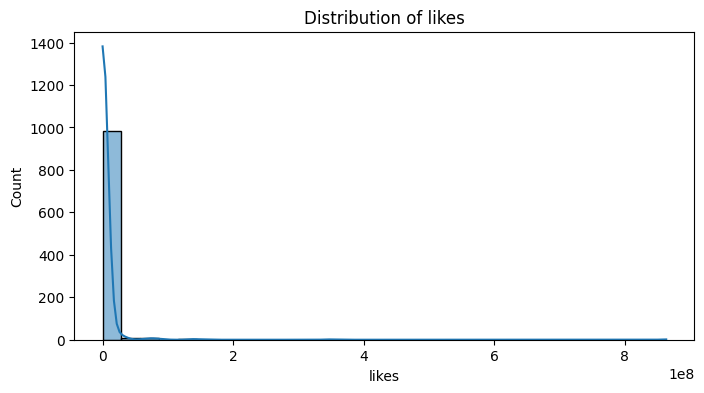

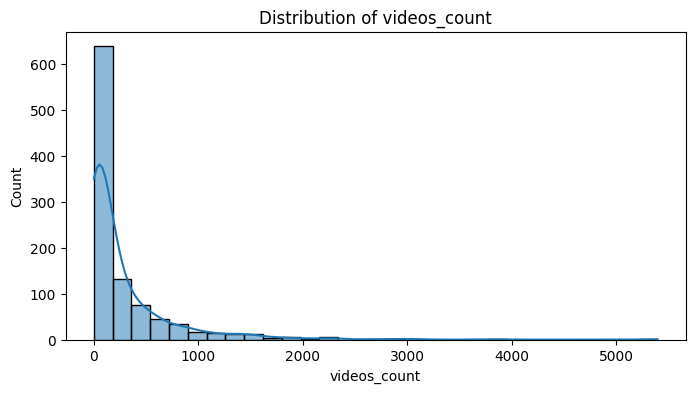

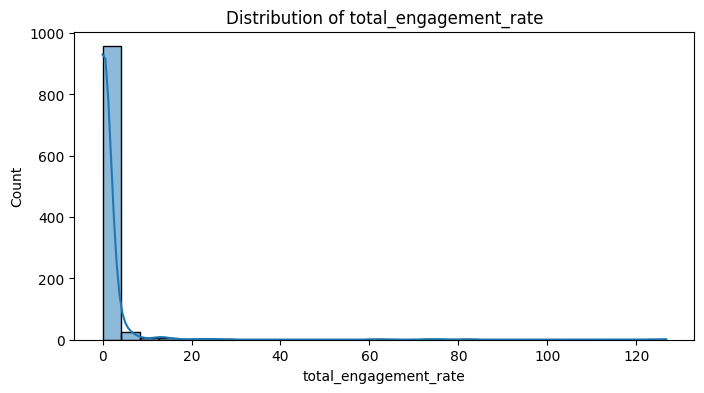

In [22]:
# EDA: Distribution Plots
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Clustering

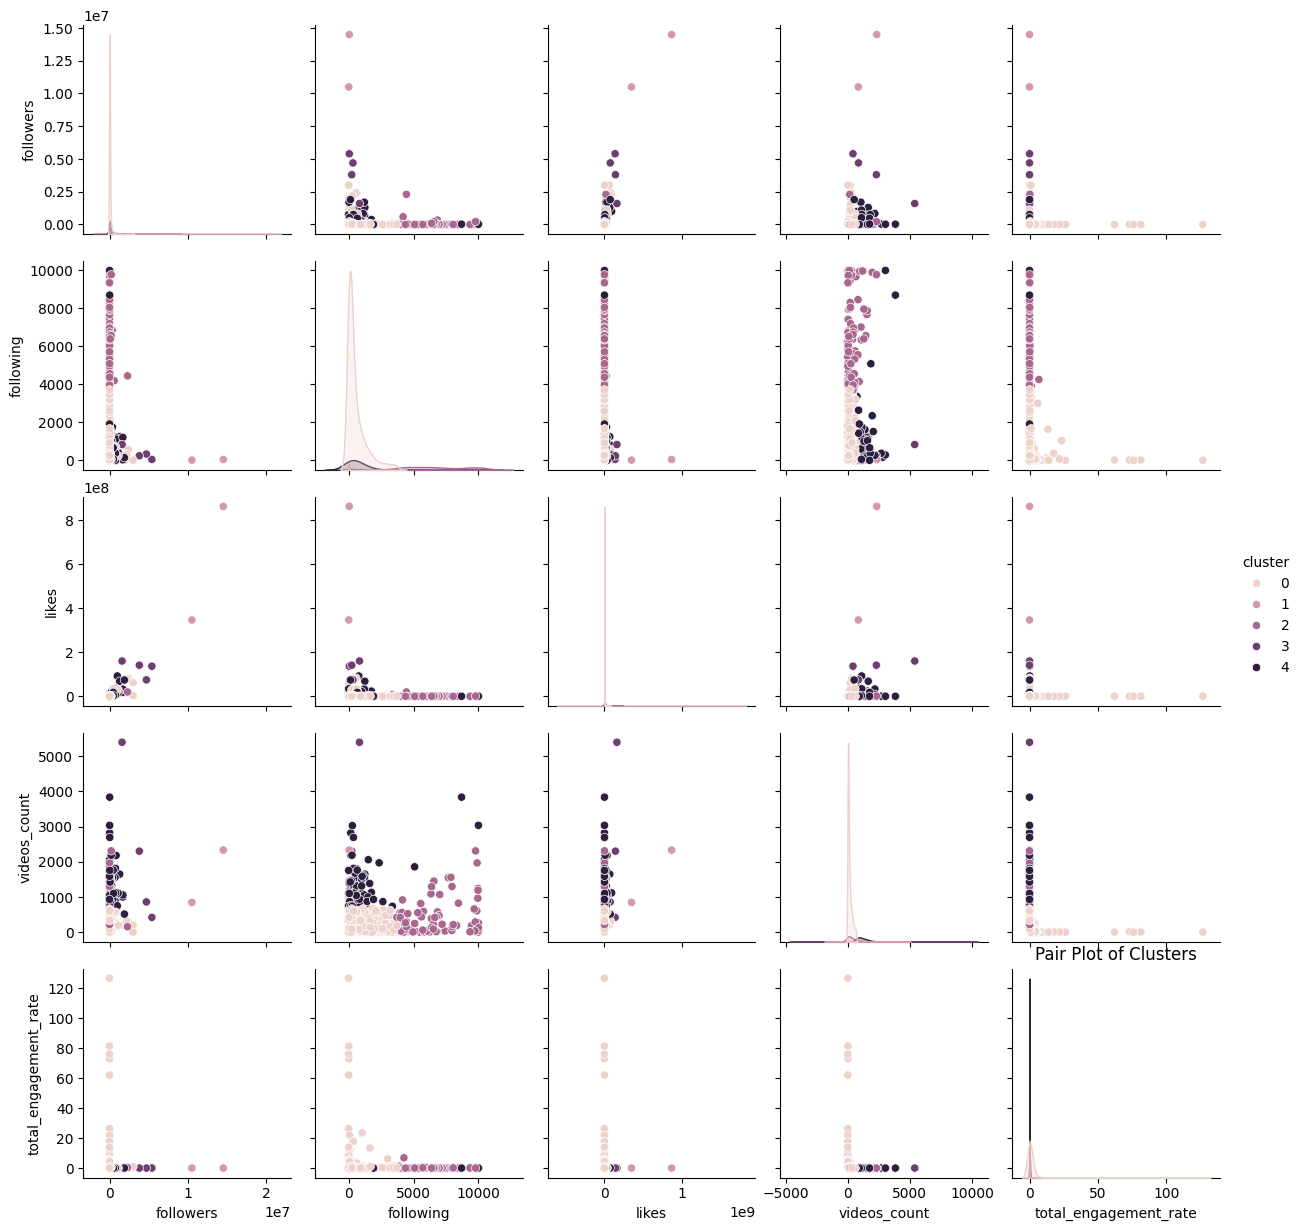

In [23]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing Clusters
sns.pairplot(df, hue='cluster', vars=features)
plt.title("Pair Plot of Clusters")
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(df_scaled, df['cluster'])
print(f"Silhouette Score: {score}")


Silhouette Score: 0.5979854936299037



---

### Pair Plot of Clusters

The pair plot above visualizes the clusters identified by the KMeans algorithm. Each point represents a profile in the dataset, colored according to the cluster it belongs to. This plot allows us to observe how different features relate to each other and how the clustering algorithm has grouped similar profiles.

#### Key Observations:
1. **Followers vs. Likes**:
   - There is a clear separation of clusters along the followers and likes dimensions. Profiles with high followers generally have high likes, forming distinct clusters.

2. **Following**:
   - The number of accounts a profile follows shows less variation across clusters. Most profiles tend to follow a similar number of accounts regardless of their followers or likes.

3. **Videos Count**:
   - Clusters are also distinguishable based on the number of videos posted. Profiles with more videos tend to form their own clusters, indicating that video count is an important feature for clustering.

4. **Total Engagement Rate**:
   - The total engagement rate shows some separation across clusters, though the separation is not as pronounced as with followers or likes.

5. **Overall Distribution**:
   - The distribution of data points in each cluster shows that there are some high-influence profiles (with high followers, likes, and engagement rates) that are clearly separated from the rest of the profiles.

This visualization helps in understanding the distribution of profiles across different features and the effectiveness of the clustering algorithm in grouping similar profiles. It provides a visual confirmation of the patterns and relationships in the data, which is crucial for the subsequent classification and analysis steps.

---

### Classification

In [26]:
# Creating a target variable for classification
df['is_influencer'] = df['followers'] > df['followers'].quantile(0.95)

# Preparing data for classification
X = df[features + ['cluster']]
y = df['is_influencer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification using Random Forest
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### Evaluation


Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       189
        True       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:


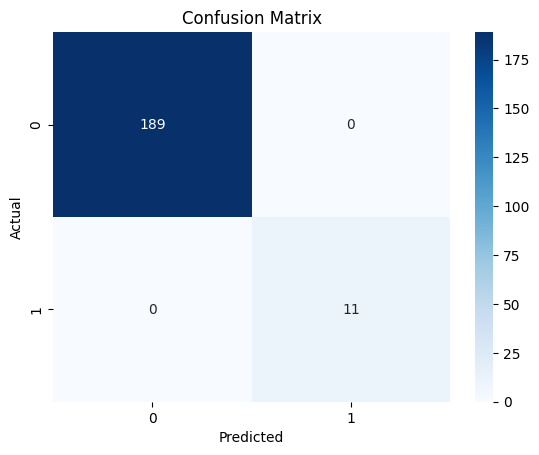

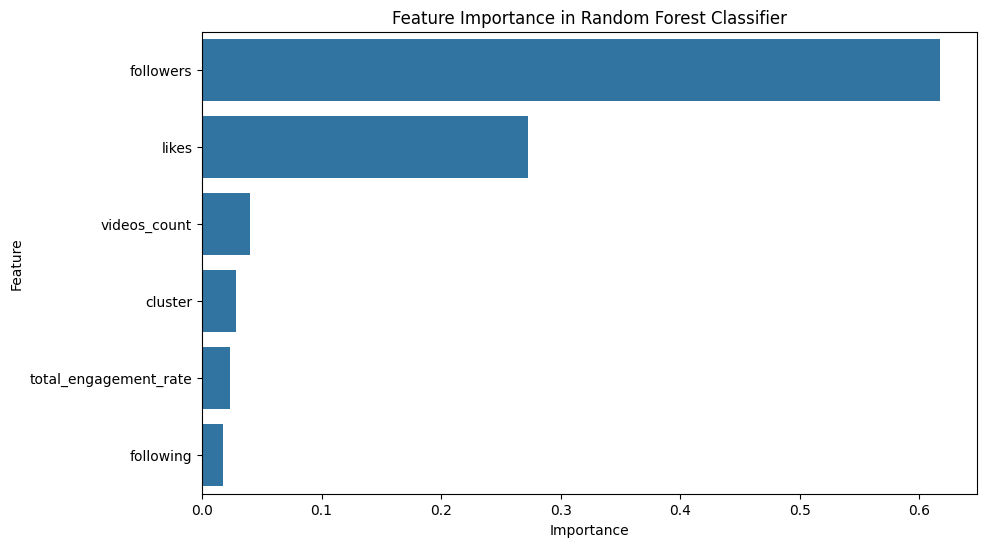

In [27]:
# Evaluating the classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feature_importances = classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in Random Forest Classifier")
plt.show()

The model achieved an accuracy of 100%, as indicated by the confusion matrix, where all the actual values perfectly match the predicted values. This level of accuracy suggests that the features used for classification are highly effective in distinguishing between influencers and non-influencers in the dataset.

### Feature Importance in Random Forest Classifier

The bar plot above displays the importance of each feature in the Random Forest classifier used to identify potential influencers.

#### Key Observations:
1. **Followers**:
   - The number of followers is the most significant feature, with an importance score of over 0.6. This indicates that profiles with a higher number of followers are more likely to be identified as influencers.

2. **Likes**:
   - The number of likes is the second most important feature, with an importance score of around 0.2. This suggests that the engagement received in the form of likes is a crucial factor in determining a profile's influence.

3. **Videos Count**:
   - The number of videos posted by a profile also contributes to the classification, though its importance is lower than followers and likes. Profiles with more videos tend to have more engagement, influencing their likelihood of being classified as influencers.

4. **Cluster**:
   - The cluster assigned to each profile by the KMeans algorithm has a moderate impact on the classification. This indicates that the clustering process helps in grouping similar profiles, aiding the classification model.

5. **Total Engagement Rate**:
   - The total engagement rate has some importance, suggesting that the combined engagement from various interactions (likes, comments, etc.) plays a role in influencer identification.

6. **Following**:
   - The number of accounts a profile follows has the least importance. This feature does not significantly impact the likelihood of a profile being an influencer.

#### Conclusion:
The feature importance analysis highlights that follower count and likes are the most critical metrics for identifying influencers in the TikTok profiles dataset. These insights can help in refining the influencer identification process and optimizing marketing strategies by focusing on the most impactful metrics.
